In [15]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Importing Scikit Learn Libararies
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    format = '%(asctime)s) - %(levelname)s - %(message)s',
                    filemode = 'w')
logging.info('Model Started')

In [18]:
# Import data using pandas function

df = pd.read_csv('C:\ENE_Bank_Approval_MLModel\ml_project\data\loan_data.csv')
df.sample(frac = 1)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
27941,30.0,male,Master,132783.0,8,OWN,12000.0,PERSONAL,13.57,0.09,10.0,660,No,0
20130,29.0,male,Master,35407.0,6,RENT,4000.0,VENTURE,13.92,0.11,10.0,588,No,1
30276,38.0,female,Bachelor,61204.0,12,MORTGAGE,3000.0,PERSONAL,15.05,0.05,12.0,626,Yes,0
33927,24.0,male,Associate,102444.0,1,MORTGAGE,25000.0,MEDICAL,11.26,0.24,4.0,684,No,0
40611,25.0,male,Associate,145287.0,1,MORTGAGE,13249.0,PERSONAL,10.24,0.09,4.0,667,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,24.0,male,Master,110953.0,0,RENT,25000.0,MEDICAL,15.33,0.23,2.0,662,No,1
15273,23.0,male,Bachelor,154696.0,3,MORTGAGE,6000.0,EDUCATION,7.49,0.04,2.0,560,No,0
1331,24.0,male,Associate,29548.0,3,RENT,1000.0,PERSONAL,17.99,0.03,3.0,631,No,1
26727,31.0,male,Associate,132997.0,11,MORTGAGE,5000.0,VENTURE,14.96,0.04,9.0,706,No,0


In [19]:
logging.info('Data Ingestion Process Begins...')

In [20]:
# Checking dataset information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

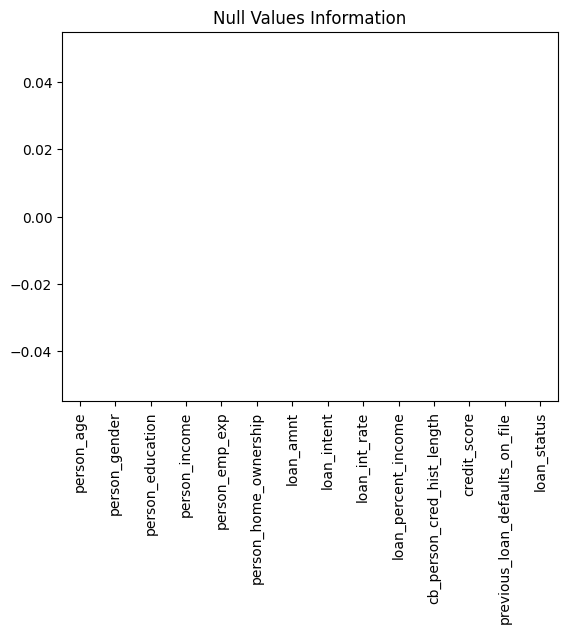

In [21]:
df.isnull().sum().plot(kind = 'bar',cmap = 'viridis')
plt.title('Null Values Information')
plt.show()

In [22]:
# Split the dataset into Categorical and Numerical

numerical_col= df.select_dtypes(include = ['int64','float64'])
categorical_col = df.select_dtypes(include = 'object')

In [23]:
# Split the dataset into Categorical and Numerical

numerical_col = df.select_dtypes(exclude ='object')
numerical_col # 45000 rows × 9 columns

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


In [35]:
#  EDA : Univariate Analysis - Evaluating Descriptive Stats

def univariate_stats():
  from collections import OrderedDict

  stats = []

  for i in numerical_col:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count': df[i].count(),
        'Minimum': df[i].min(),
        'Maximum': df[i].max(),
        'Range': df[i].max() - df[i].min(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Q1': df[i].quantile(0.25),
        'Q3': df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation': df[i].std(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'Variance': df[i].var()



    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

  return report

ans = univariate_stats()
ans

,Feature,Count,Minimum,Maximum,Range,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis,Variance
0,person_age,45000,20.00,144.00,124.00,27.764178,26.00,24.00,30.00,6.00,6.045108,2.548154,18.649449,3.654333e+01
1,person_income,45000,8000.00,7200766.00,7192766.00,80319.053222,67048.00,47204.00,95789.25,48585.25,80422.498632,34.137583,2398.684769,6.467778e+09
2,person_emp_exp,45000,0.00,125.00,125.00,5.410333,4.00,1.00,8.00,7.00,6.063532,2.594917,19.168324,3.676642e+01
3,loan_amnt,45000,500.00,35000.00,34500.00,9583.157556,8000.00,5000.00,12237.25,7237.25,6314.886691,1.179731,1.351215,3.987779e+07
4,loan_int_rate,45000,5.42,20.00,14.58,11.006606,11.01,8.59,12.99,4.40,2.978808,0.213784,-0.420335,8.873299e+00
5,loan_percent_income,45000,0.00,0.66,0.66,0.139725,0.12,0.07,0.19,0.12,0.087212,1.034512,1.082416,7.605987e-03
6,cb_person_cred_hist_length,45000,2.00,30.00,28.00,5.867489,4.00,3.00,8.00,5.00,3.879702,1.631720,3.725945,1.505209e+01
7,credit_score,45000,390.00,850.00,460.00,632.608756,640.00,601.00,670.00,69.00,50.435865,-0.610261,0.203022,2.543776e+03
8,loan_status,45000,0.00,1.00,1.00,0.222222,0.00,0.00,0.00,0.00,0.415744,1.336351,-0.214176,1.728433e-01


In [ ]:
df.columns #To display column names

In [ ]:
# Encoding Technique
'''
Step 1 : Converting Categorical Columns to Numerical Columns
Step 2 : Use Label Encoder or One Hot Encoder

'''
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# # Encoding all Categorical columns using Label Encoder: Indepedent columns
# df['person_gender'] = le.fit_transform(df['person_gender'])
# df['person_education']=le.fit_transform(df['person_education'])
# df['person_home_ownership']=le.fit_transform(df['person_home_ownership'])
# df['loan_intent']=le.fit_transform(df['loan_intent'])

# df.head()

from sklearn.preprocessing import LabelEncoder


for i in categorical_col.columns:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
    df

In [ ]:
# Checking Heatmap 

# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (20,10))
sns.heatmap(df.corr(),annot = True, vmax = 1, vmin = -1, center = 0, cmap = 'viridis')

In [ ]:
df['loan_status'].value_counts() # classification problem whether the target column balnced or not not 

# loan_status
# 0    35000
# 1    10000
# Name: count, dtype: int64